In [1]:
#ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV 

In [2]:
#importing the datasets
train_set = pd.read_csv('./outputs/train_set_augmented_left.csv')
test_set = pd.read_csv('./outputs/test_set_augmented_left.csv')

In [3]:
#Split into features and target; x = features, y = target
x_train = train_set.iloc[:, 1:]
y_train = train_set['label']

x_test = test_set.iloc[:, 1:]
y_test = test_set['label']

#combining test and train set for cross validation
x = pd.concat([x_train, x_test])
y = pd.concat([y_train, y_test])

In [4]:
clf = SVC()
clf.fit(x_train, y_train)

SVC()

In [5]:
y_cross_scores = cross_val_score(clf, x, y, cv=5, scoring = 'accuracy')
print("%0.2f%% accuracy with a standard deviation of %0.2f%%" % (y_cross_scores.mean()*100, y_cross_scores.std()*100))

65.20% accuracy with a standard deviation of 0.16%


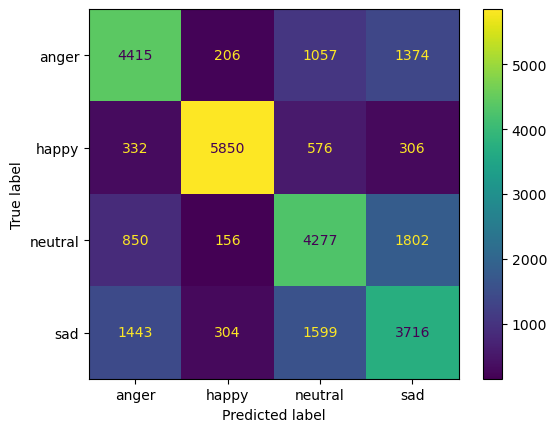

In [6]:
y_cross_predict = cross_val_predict(clf, x_train, y_train, cv = 5) 
y_cross_cm = confusion_matrix(y_train, y_cross_predict)
y_cross_display = ConfusionMatrixDisplay(confusion_matrix=y_cross_cm, display_labels=clf.classes_)
y_cross_display.plot()

In [7]:
print("The mean accuracy of the given test data and labels is: %0.2f%%" %(clf.score(x_test, y_test) * 100))

The mean accuracy of the given test data and labels is: 66.13%


In [8]:
y_pred = clf.predict(x_test)

In [9]:
print("The mean accuracy of the given test data and labels is: %0.2f%%" %(clf.score(x_test, y_test) * 100))

The mean accuracy of the given test data and labels is: 66.13%


In [10]:
y_pred_accuracy = accuracy_score(y_test, y_pred)
y_pred_precision = precision_score(y_test, y_pred, average='macro')
y_pred_recall = recall_score(y_test, y_pred, average='macro')
y_pred_f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: ", y_pred_accuracy*100)
print("Precision: ", y_pred_precision*100)
print("Recall: ", y_pred_recall*100)
print("F1: ", y_pred_f1*100)

Accuracy:  66.13449443638123
Precision:  65.45801629639284
Recall:  65.00343112237871
F1:  65.14787079990862


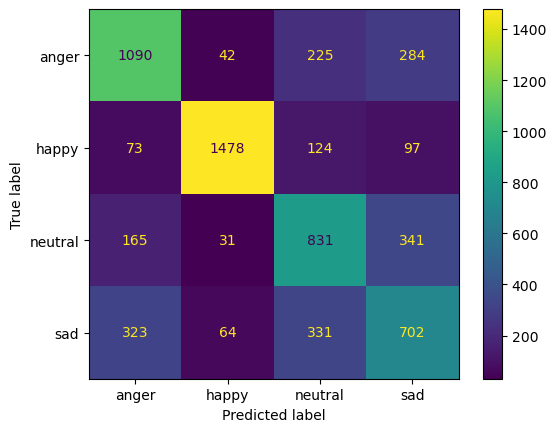

In [11]:
y_pred_cm = confusion_matrix(y_test, y_pred)
y_pred_display = ConfusionMatrixDisplay(confusion_matrix=y_pred_cm, display_labels=clf.classes_)
y_pred_display.plot()

# Hyperparameter Tuning

In [12]:
#Hyperparameter Tuning paramenters
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']} 

In [13]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
grid.fit(x_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.657 total time= 6.4min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.657 total time= 8.0min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.661 total time= 7.8min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.659 total time= 7.0min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.660 total time= 7.3min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.623 total time= 7.6min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.626 total time= 7.6min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.627 total time= 7.6min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.628 total time= 7.7min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.628 total time= 7.3min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.506 total time= 9.9min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [15]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.scorer_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, gamma=1)
0.8026393053109604
<function _passthrough_scorer at 0x000002461000BDC0>


In [16]:
grid_predictions = grid.predict(x_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

       anger       0.79      0.81      0.80      1641
       happy       0.93      0.93      0.93      1772
     neutral       0.72      0.77      0.74      1368
         sad       0.76      0.68      0.72      1420

    accuracy                           0.81      6201
   macro avg       0.80      0.80      0.80      6201
weighted avg       0.81      0.81      0.81      6201



# Exporting Best Model

In [17]:
from joblib import dump

dump(grid, './SVM_results/svm_c-100_gamma-1_left.joblib')

['./SVM_results/svm_c-100_gamma-1_left.joblib']